# Mixed World: Using ImageJ 1.x
Familiar with [ImageJ 1.x](https://imagej.net/ImageJ1)? Want to mix and match? Here's how.

## Enabling ImageJ 1.x

In order to make use of [ImageJ 1.x](https://imagej.net/ImageJ1) functionality, we need to ensure the [ImageJ Legacy](https://imagej.net/ImageJ_Legacy) component is present on the runtime classpath.

In [3]:
#@ImageJ ij

// Behind a firewall? Configure your proxy settings here.
//System.setProperty("http.proxyHost","myproxy.domain")
//System.setProperty("http.proxyPort","8080")

"ImageJ is ready to go."

ImageJ is ready to go.

ImageJ2 patches ImageJ 1.x so that it can run [headless](https://imagej.net/Headless). However, the SciJava Jupyter kernel does _not_ launch Java headless by default.

Let's check whether we are running headless now:

In [7]:
[["Running headless?": Boolean.getBoolean("java.awt.headless"),
"Does ImageJ agree?": ij.ui().isHeadless(),
"GraphicsEnvironment?": java.awt.GraphicsEnvironment.isHeadless()]]

Running headless?,Does ImageJ agree?,GraphicsEnvironment?
false,false,false


## Calling ImageJ 1.x directly

Either way, we can call the ImageJ1 API directly as desired:

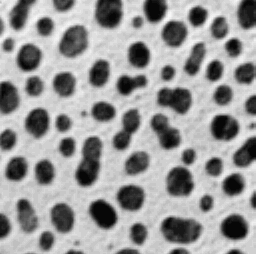

In [8]:
import ij.IJ
blobsIJ1 = IJ.openImage("http://imagej.net/images/blobs.gif")

## Using the legacy service

The ImageJ Legacy component includes a handy `LegacyService` which provides operations bridging the gap between ImageJ 1.x and ImageJ2. For example, we can convert an ImageJ2 `Dataset` to an ImageJ1 `ImagePlus`:

In [14]:
#@LegacyService legacy

// Open an IJ2 Dataset.
clown = ij.io().open("http://imagej.net/images/clown.png")

// Convert it to an IJ1 ImagePlus.
clownDisplay = ij.display().createDisplay(clown)
clownIJ1 = legacy.getImageMap().registerDisplay(clownDisplay)

[["IJ2 clown":clown, "IJ1 clown":clownIJ1]]

ImageJ2 clown,ImageJ1 clown


And ImageJ1 `ImagePlus` objects can be converted to ImageJ2 `ImageDisplay` and/or `Dataset`:

In [16]:
// Convert IJ1 blobs image to an IJ2 image.
blobsDisplay = legacy.getImageMap().registerLegacyImage(blobsIJ1)
blobsIJ2 = blobsDisplay.get(0).getData()

[["IJ1 blobs":blobsIJ1, "IJ2 blobs":blobsIJ2]]

IJ1 blobs,IJ2 blobs


__Quiz:__ Why did the pixels invert?